# 任务描述：
Kaggle共享单车项目：   
根据城市共享单车公共数据集中租车日期，租车季节，租车气温，租车空气湿度等数据。对数据进行清洗，计算描述性统计数据，并实现数据的基本可视化功能。
1. 数据清洗   
数据清洗属于数据预处理的一步。数据预处理的主要内容包括数据清洗、数据集成、数据变换。   

数据清洗可能要做的事：
+ 调整数据类型
+ 修改列名
+ 选择部分子集：可能有部分列在数据分析中不需要用到
+ 可能存在逻辑问题需要筛选
+ 格式一致化
+ 消灭空值
2. 计算描述性统计数据   
    ——>EDA
3. 数据基本可视化


In [2]:
# 数据处理
import pandas as pd
import numpy as np

# 画图
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# 一、数据加载

In [7]:
df_train = pd.read_csv('./Data/train.csv')
df_test = pd.read_csv('./Data/test.csv')

In [8]:
from sklearn.model_selection import train_test_split
X=df_train.drop('count',axis=1)
y=df_train['count']
X_Train,X_Validate,y_Train,y_Validate=train_test_split(X,y,test_size=0.2,random_state=0)
df_train=pd.concat([X_Train,y_Train],axis=1)
df_validate=pd.concat([X_Validate,y_Validate],axis=1)

In [9]:
df_test.shape

(6493, 9)

In [10]:
df_train.shape

(8708, 12)

In [11]:
df_validate.shape

(2178, 12)

# 二、数据预处理
Exploratory Data Analysis(EDA)

## 2.1：整体

In [12]:
df_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
3662,2011-09-03 12:00:00,3,0,0,1,28.70,32.575,61,15.0013,97,160,257
8648,2012-08-02 17:00:00,3,0,1,1,33.62,38.635,52,16.9979,90,775,865
7053,2012-04-12 06:00:00,2,0,1,1,12.30,14.395,65,16.9979,2,94,96
2685,2011-06-19 19:00:00,2,0,0,1,29.52,34.090,62,8.9981,94,217,311
5927,2012-02-03 04:00:00,1,0,1,1,10.66,12.880,60,15.0013,0,2,2


In [13]:
df_train.sort_index(inplace=True)

In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8708 entries, 0 to 10884
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    8708 non-null   object 
 1   season      8708 non-null   int64  
 2   holiday     8708 non-null   int64  
 3   workingday  8708 non-null   int64  
 4   weather     8708 non-null   int64  
 5   temp        8708 non-null   float64
 6   atemp       8708 non-null   float64
 7   humidity    8708 non-null   int64  
 8   windspeed   8708 non-null   float64
 9   casual      8708 non-null   int64  
 10  registered  8708 non-null   int64  
 11  count       8708 non-null   int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 884.4+ KB


In [15]:
df_train.nunique()

datetime      8708
season           4
holiday          2
workingday       2
weather          4
temp            49
atemp           58
humidity        88
windspeed       28
casual         295
registered     703
count          792
dtype: int64

In [16]:
# 检查缺失数据
df_train.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [17]:
df_train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000
mean,2.496899,0.029513,0.679835,1.413413,20.151585,23.566106,61.778824,12.848368,35.888723,154.966812,190.855535
std,1.118607,0.169249,0.466567,0.628714,7.772519,8.461146,19.201010,8.242156,49.837535,150.871639,180.852259
min,1.000000,0.000000,0.000000,1.000000,0.820000,2.275000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,0.000000,1.000000,13.940000,16.665000,46.750000,7.001500,4.000000,36.000000,43.000000
50%,2.000000,0.000000,1.000000,1.000000,20.500000,24.240000,62.000000,12.998000,16.000000,117.000000,143.000000
75%,4.000000,0.000000,1.000000,2.000000,26.240000,31.060000,77.000000,16.997900,48.000000,222.000000,285.000000
max,4.000000,1.000000,1.000000,4.000000,41.000000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


## 2.2：各维度

### 2.2.1：count
先用箱形图查看数据分布，发现有很多异常值，丢弃离群值，再次查看处理后的数据的箱形图，异常值减少。   

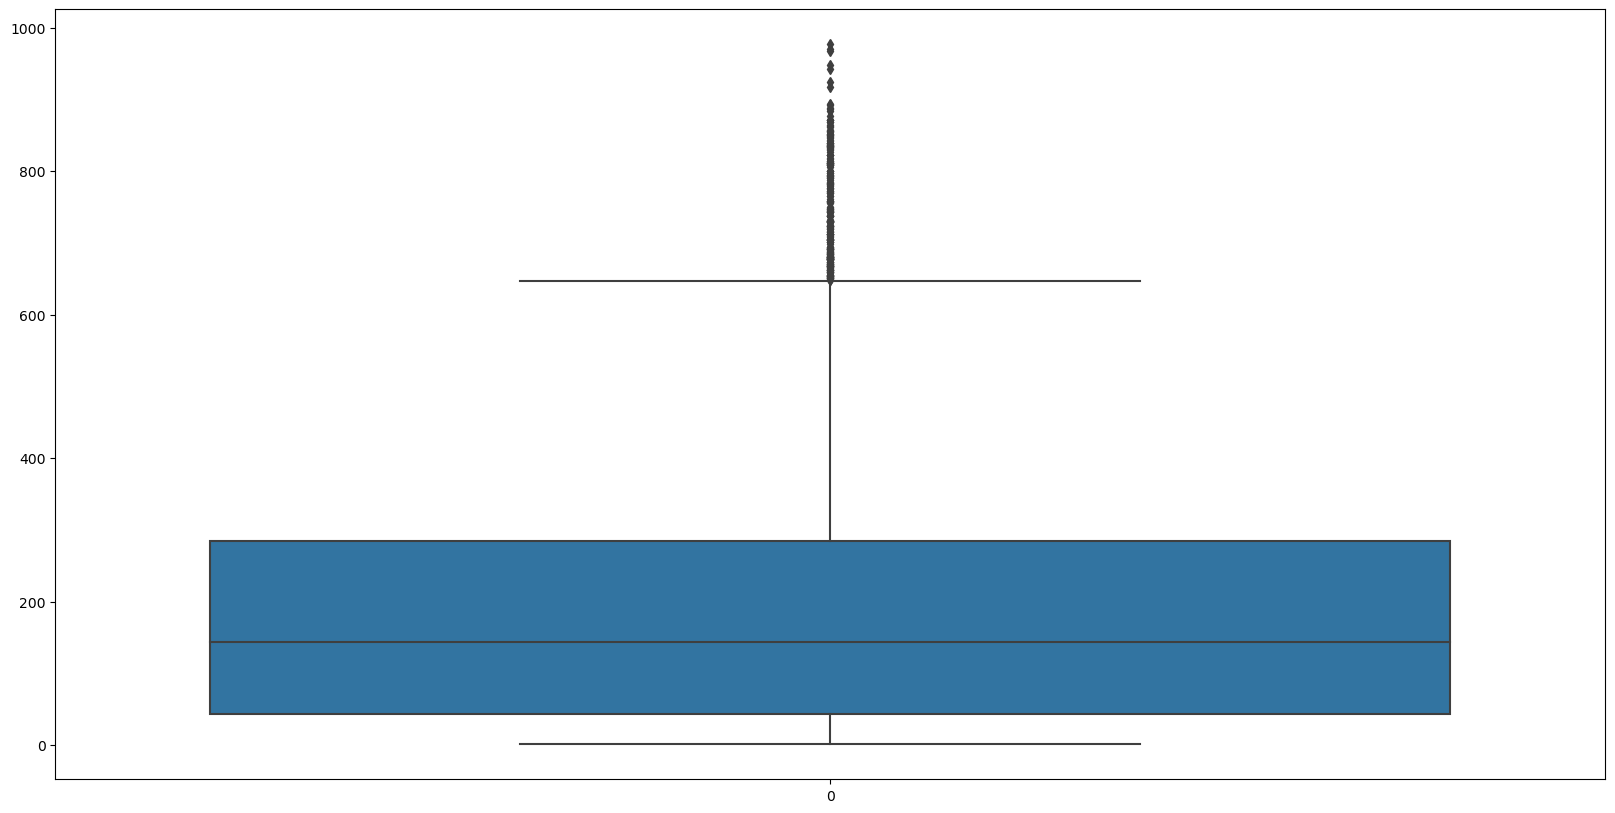

In [18]:
fig=plt.figure(figsize=(20,10))
sns.boxplot(df_train['count'])

plt.show()

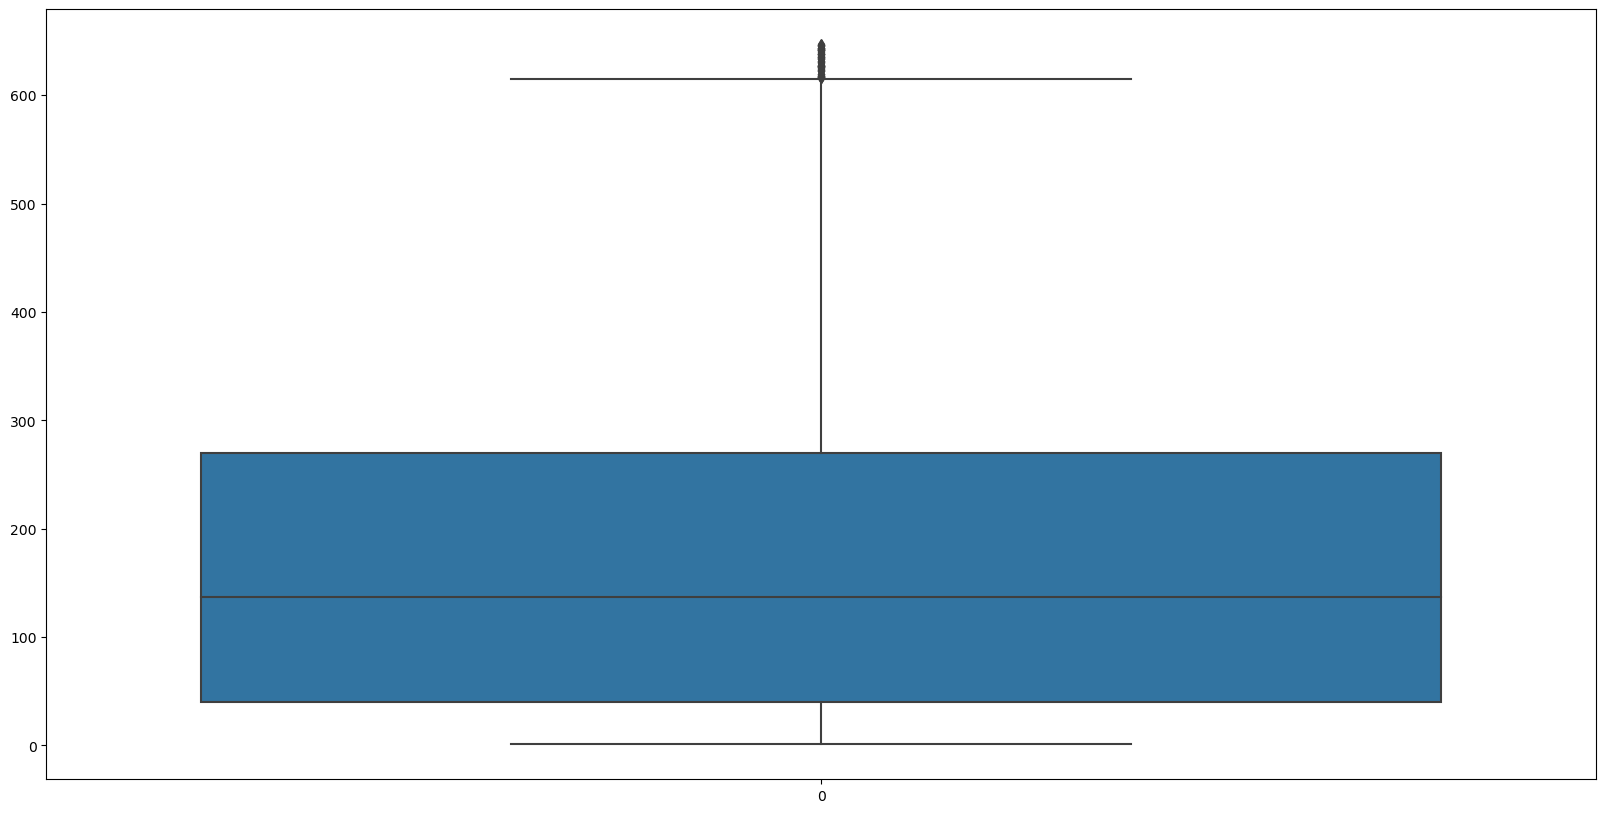

In [19]:
# 抛弃离群值
def drop_outliers(df, target):
    q1 = df[target].quantile(0.25)
    q3 = df[target].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df_filtered = df[(df[target] >= lower_bound) & (df[target] <= upper_bound)]
    return df_filtered

df_train = drop_outliers(df_train, 'count')

fig = plt.figure(figsize=(20, 10))
sns.boxplot(df_train['count'])
plt.show();

In [20]:
df_train.shape  # 8708->8401

(8466, 12)

查看数据分布，发现其分布不符合正态分布，进行对数变换，使之满足正态分布。

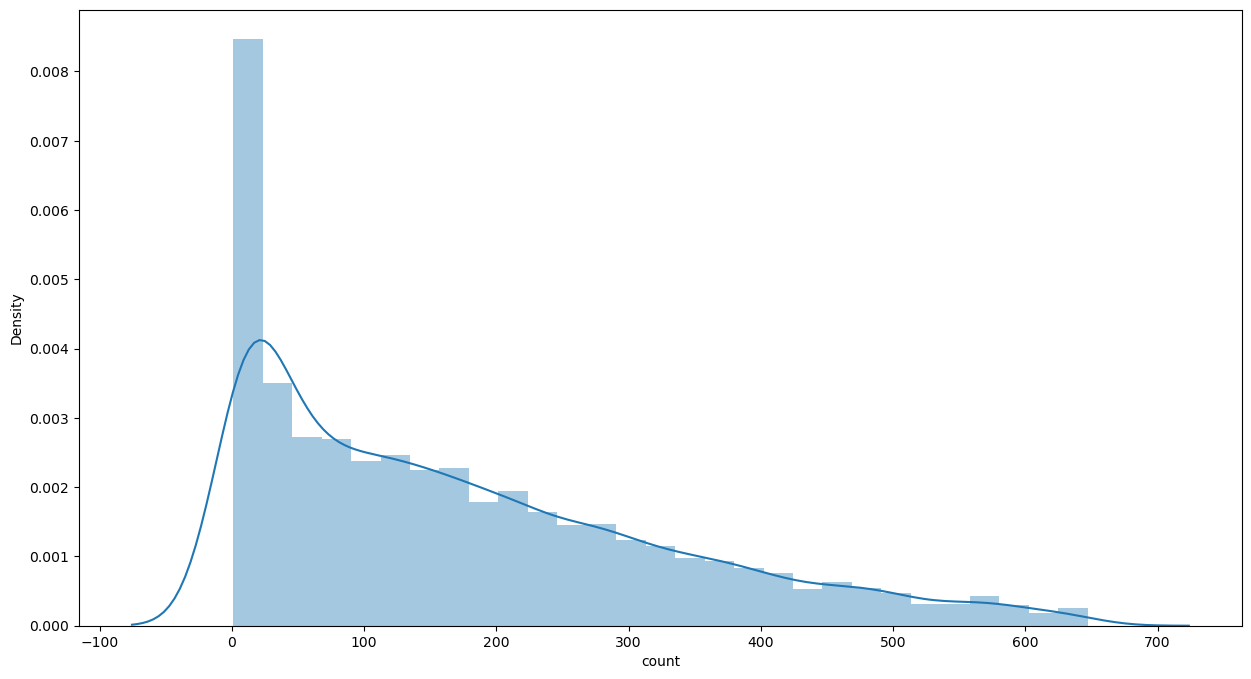

In [21]:
# 查看分布
fig = plt.figure(figsize=(15, 8))
sns.distplot(df_train['count'])

plt.show();

In [22]:
# 对数变换
df_train['log_count']=np.log(df_train['count'])

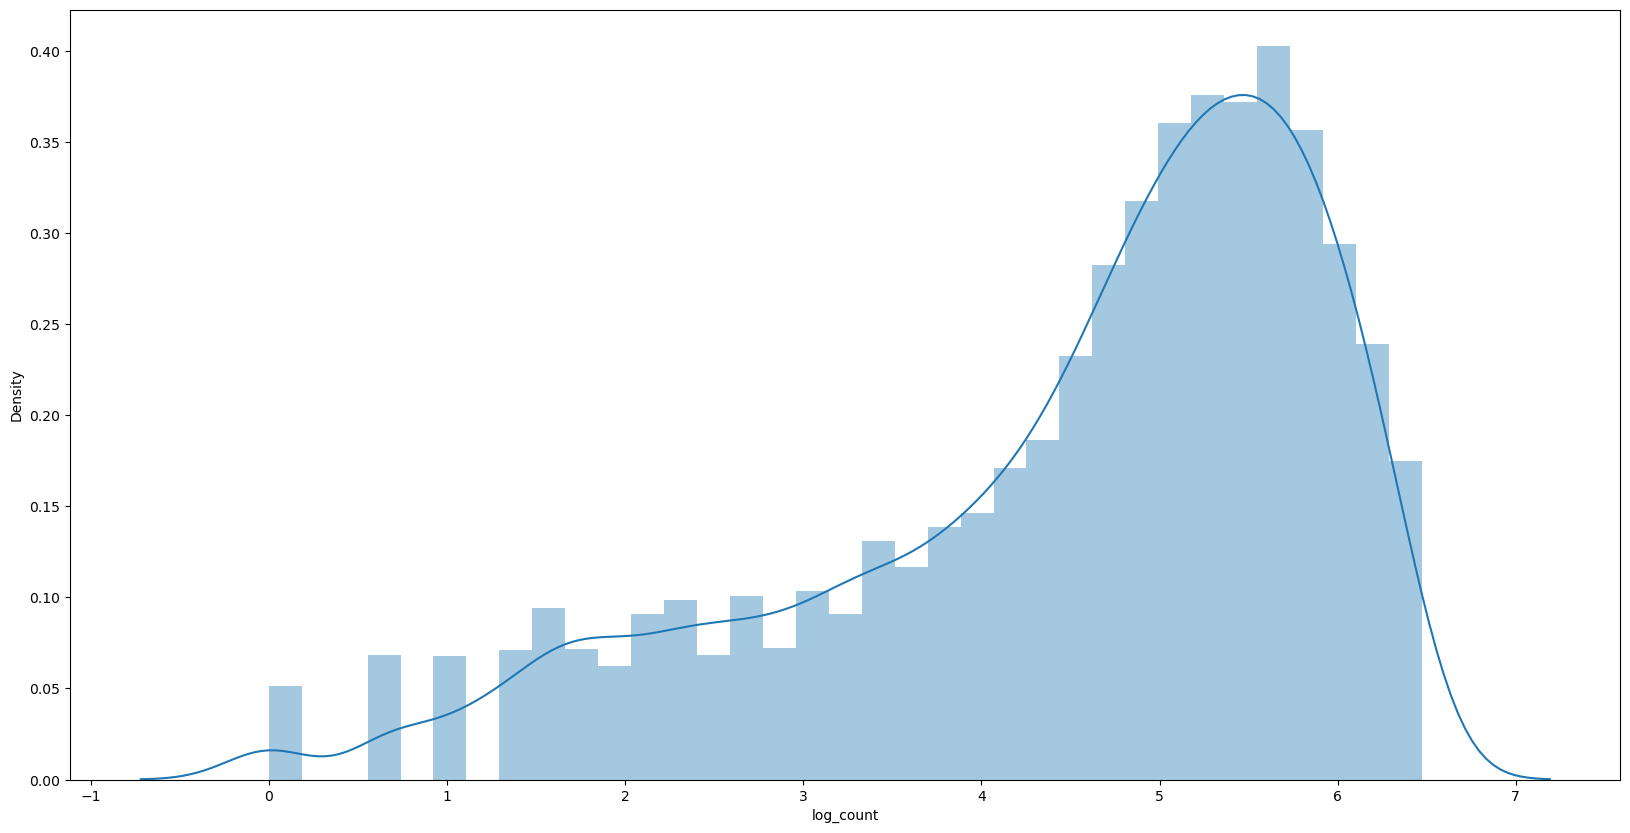

In [23]:
fig = plt.figure(figsize=(20, 10))
sns.distplot(df_train['log_count'])

plt.show();

### 2.2.2 weather

作weather和count数据的箱形图，发现Heavy Snow/Rain只有一条数据，查看具体情况，发现当时为下班时间，前后天气为Light Snow/Rain，天气影响并非主要因素，因此不妨将其归入Light Snow/Rain

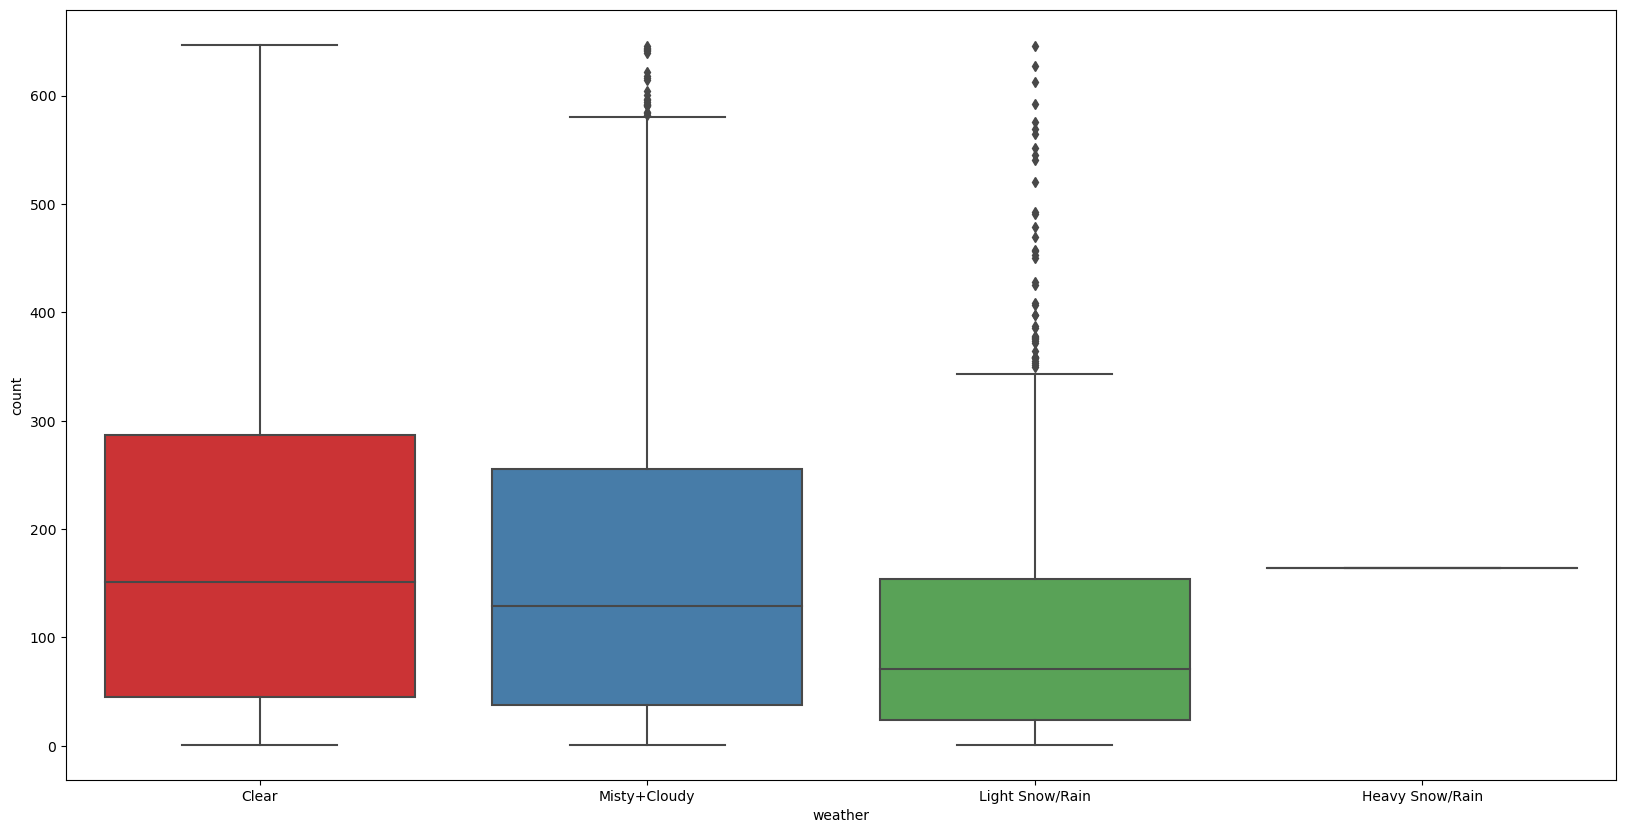

In [24]:
f, axes = plt.subplots(1,1,figsize=(20,10))
sns.boxplot(df_train,x='weather',y='count',ax=axes,palette='Set1')
axes.set_xticklabels(['Clear','Misty+Cloudy','Light Snow/Rain','Heavy Snow/Rain'])
plt.show()

In [25]:
df_train['weather'].value_counts()

1    5583
2    2227
3     655
4       1
Name: weather, dtype: int64

In [26]:
df_train[df_train['weather']==4]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,log_count
5631,2012-01-09 18:00:00,1,0,1,4,8.2,11.365,86,6.0032,6,158,164,5.099866


In [27]:
df_train[(df_train['datetime'] > '2012-01-09 08:00') & (df_train['datetime'] < '2012-01-09 22:00')]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,log_count
5621,2012-01-09 08:00:00,1,0,1,2,9.02,12.880,55,6.0032,13,407,420,6.040255
5622,2012-01-09 09:00:00,1,0,1,2,9.02,13.635,64,0.0000,9,188,197,5.283204
5623,2012-01-09 10:00:00,1,0,1,1,9.84,14.395,60,0.0000,13,95,108,4.682131
5624,2012-01-09 11:00:00,1,0,1,2,10.66,14.395,56,6.0032,6,82,88,4.477337
5626,2012-01-09 13:00:00,1,0,1,2,10.66,13.635,56,7.0015,3,77,80,4.382027
5627,2012-01-09 14:00:00,1,0,1,3,9.02,11.365,75,11.0014,5,45,50,3.912023
5628,2012-01-09 15:00:00,1,0,1,3,9.02,11.365,75,11.0014,5,64,69,4.234107
5630,2012-01-09 17:00:00,1,0,1,3,9.02,13.635,87,0.0000,5,147,152,5.023881
5631,2012-01-09 18:00:00,1,0,1,4,8.20,11.365,86,6.0032,6,158,164,5.099866
5633,2012-01-09 20:00:00,1,0,1,2,8.20,11.365,86,6.0032,5,127,132,4.882802


In [28]:
df_train.loc[df_train['weather']==4, 'weather'] = 3

In [29]:
df_train['weather'].value_counts()

1    5583
2    2227
3     656
Name: weather, dtype: int64

### 2.2.3：与weather有关的各个维度（temp、atemp、humidity、windspeed)

#### 可视化1
1. 用regplot()函数绘制散点图和回归线，观察四个维度对count的影响情况

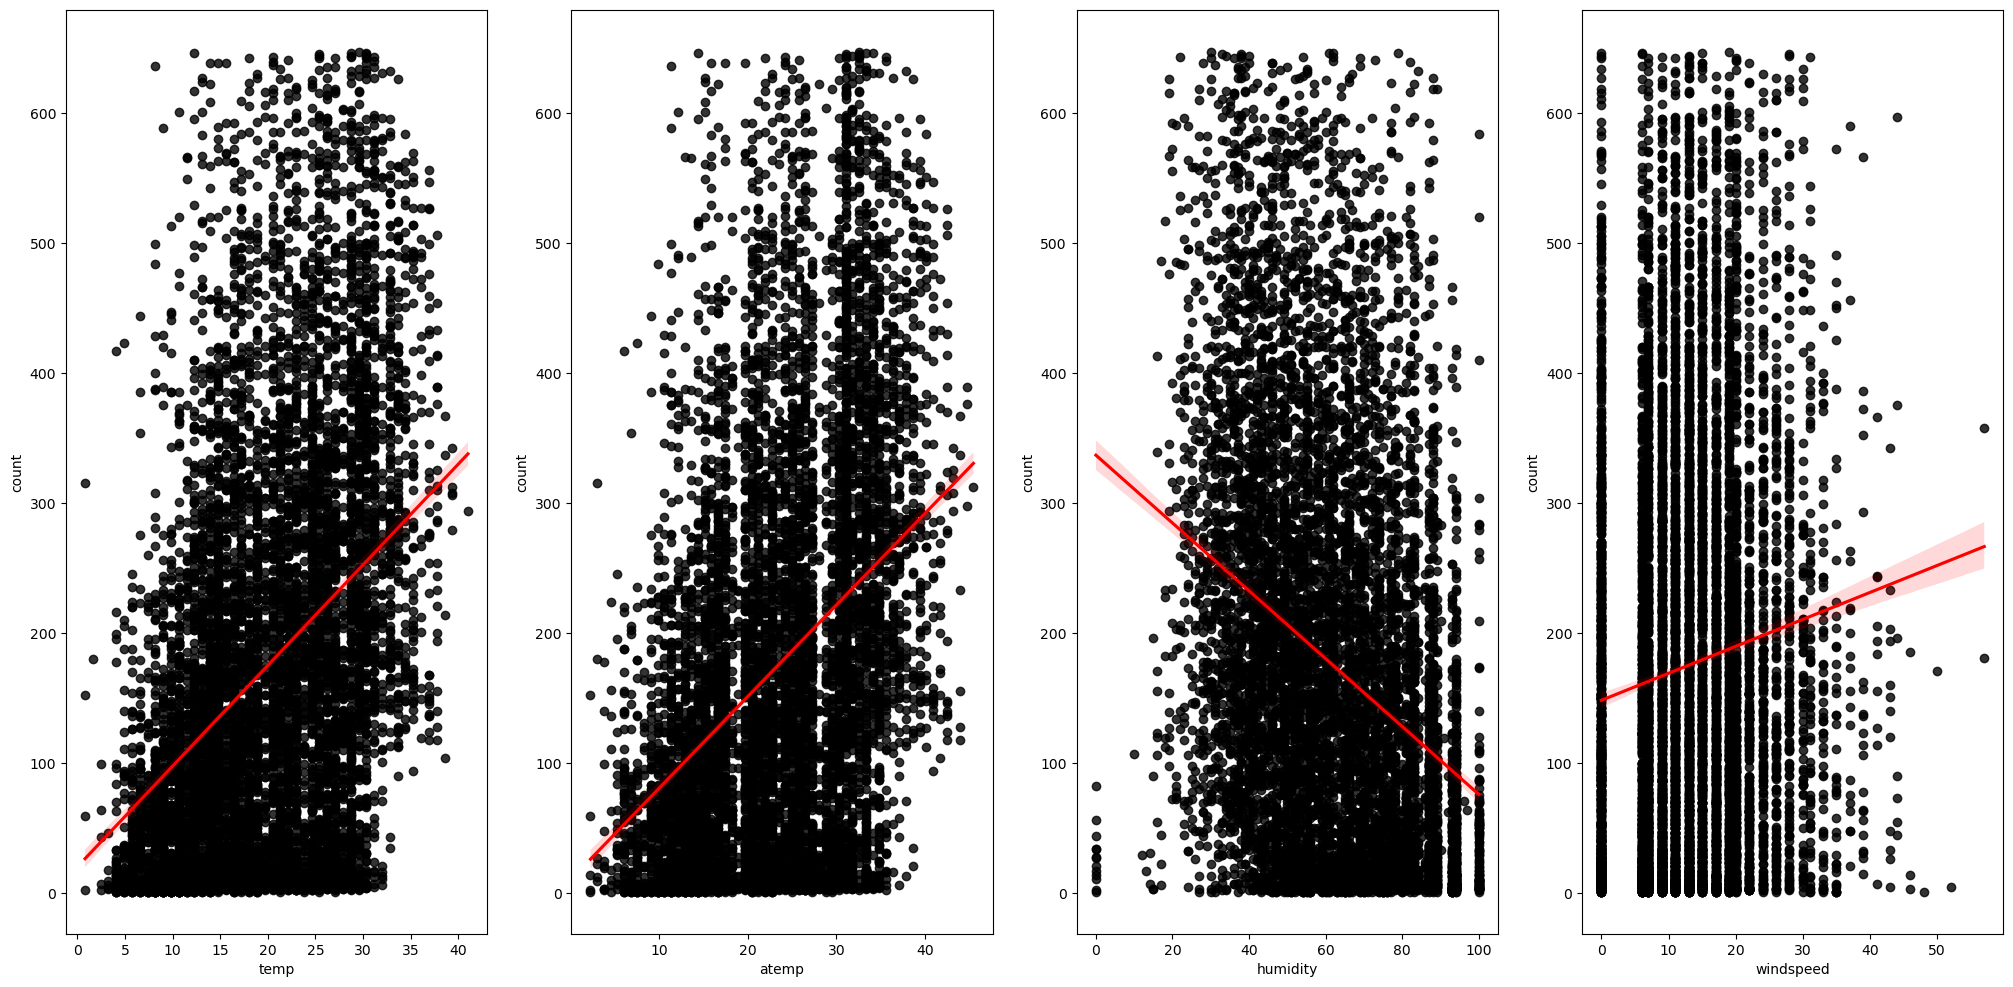

In [30]:
weather_data=df_train[['count','temp','atemp','humidity','windspeed']]
fig=plt.figure(figsize=(25,12))
axes=fig.add_subplot(1,4,1)
sns.regplot(data=weather_data,x='temp',y='count',ax=axes,scatter_kws={"color":"black"},line_kws={"color":"red"})
axes = fig.add_subplot(1, 4, 2)
sns.regplot(data=weather_data, x='atemp', y='count', ax=axes, scatter_kws={"color": "black"}, line_kws={"color": "red"})
axes = fig.add_subplot(1, 4, 3)
sns.regplot(data=weather_data, x='humidity', y='count', ax=axes, scatter_kws={"color": "black"}, line_kws={"color": "red"})
axes = fig.add_subplot(1, 4, 4)
sns.regplot(data=weather_data, x='windspeed', y='count', ax=axes, scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.show();

2. 用pairplot()函数分析这几个维度之间的相互关系

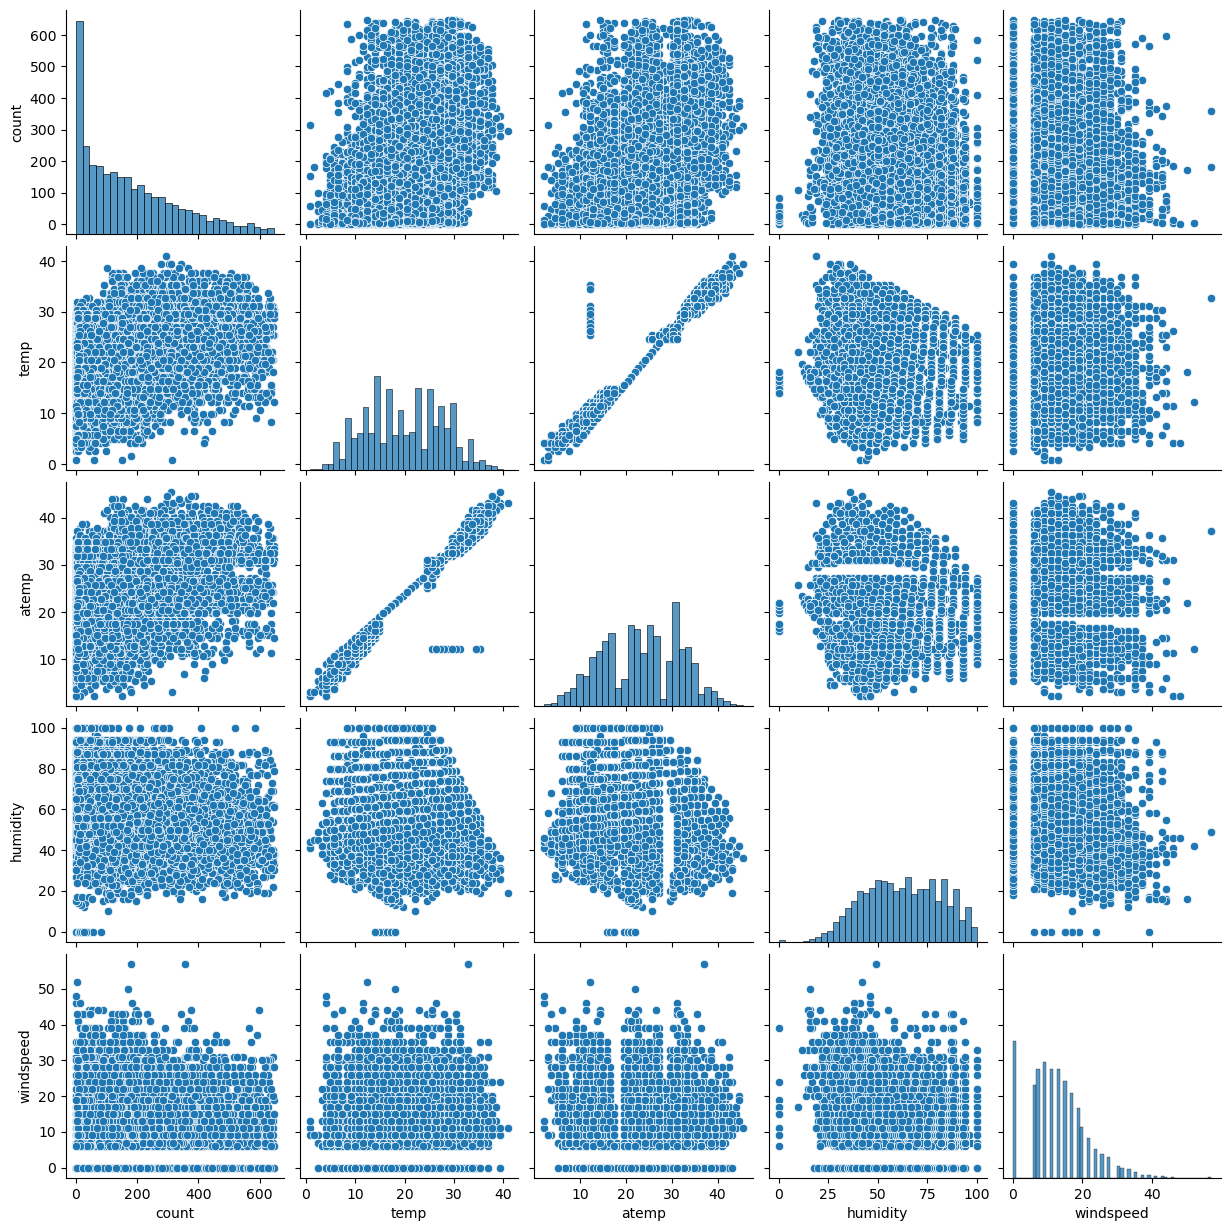

In [31]:
sns.pairplot(weather_data,palette='Set1')      #palette表示图片的色彩风格
plt.show()

观察回归线得：temp和atemp对count的影响接近。观察pairplot生成的图得：temp和atemp之间成明显的线性相关。为了简化预测模型可以去掉其中一个影响因素

#### 可视化2
再用boxplot()和stripplot()函数绘制箱线图和散点图，对各个维度进行自身数据分布进行可视化

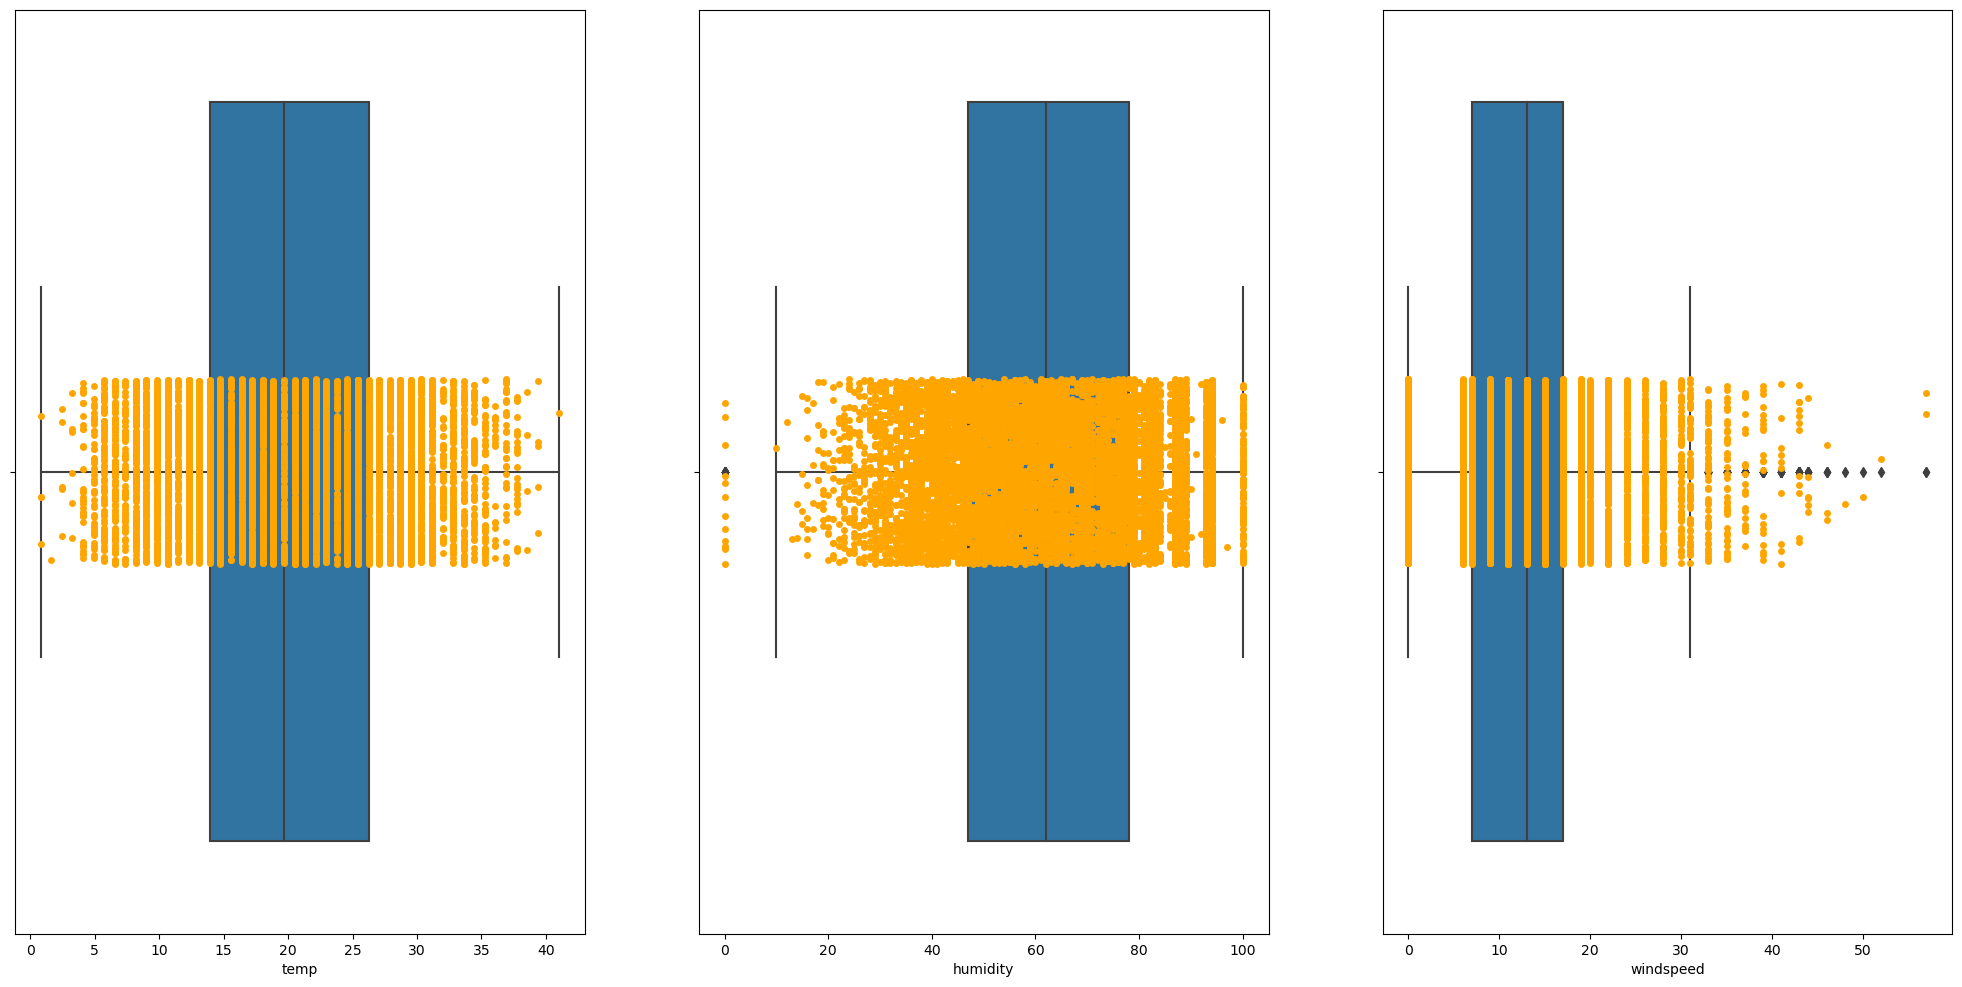

In [32]:
fig=plt.figure(figsize=(25,12))
axes=fig.add_subplot(1,3,1)
sns.boxplot(data=weather_data,x='temp',ax=axes)
sns.stripplot(data=weather_data,x='temp',color="orange",ax=axes)
axes = fig.add_subplot(1, 3, 2)
sns.boxplot(data=weather_data,x='humidity',ax=axes)
sns.stripplot(data=weather_data,x='humidity',color="orange",ax=axes)
axes = fig.add_subplot(1, 3, 3)
sns.boxplot(data=weather_data,x='windspeed',ax=axes)
sns.stripplot(data=weather_data,x='windspeed',color="orange",ax=axes)
plt.show();

纠正各维度的极端值(由上图可视化得，temp维度几乎没有极端值，所以只需对剩下两个维度进行清洗）

In [33]:
#humidity--查看极端值
mean_humidity=weather_data['humidity'].mean()
std_humidity=weather_data['humidity'].std()
weather_data[weather_data['humidity']> mean_humidity+3*std_humidity]
weather_data[weather_data['humidity']< mean_humidity-3*std_humidity]

,count,temp,atemp,humidity,windspeed
1092,2,13.94,15.910,0,16.9979
1093,1,13.94,15.910,0,16.9979
1097,44,15.58,19.695,0,19.0012
1099,17,16.40,20.455,0,11.0014
1100,11,16.40,20.455,0,16.9979
1101,34,17.22,21.210,0,15.0013
1104,14,18.04,21.970,0,15.0013
1105,21,17.22,21.210,0,16.9979
1107,82,18.04,21.970,0,23.9994
1108,56,18.04,21.970,0,39.0007


In [34]:
#humidity--纠正极端值
df_train['humidity']=np.where(weather_data['humidity']==0,10,weather_data['humidity'])

In [35]:
#windspeed--查看极端值
mean_humidity=weather_data['windspeed'].mean()
std_humidity=weather_data['windspeed'].std()
weather_data[weather_data['windspeed']< mean_humidity-3*std_humidity]
weather_data[weather_data['windspeed']> mean_humidity+3*std_humidity]

,count,temp,atemp,humidity,windspeed
750,90,22.96,26.515,21,43.9989
752,243,18.86,22.725,33,40.9973
753,205,16.40,20.455,40,40.9973
757,45,13.94,14.395,46,43.9989
760,5,12.30,12.120,42,51.9987
761,3,11.48,11.365,41,46.0022
848,162,25.42,31.060,29,39.0007
861,45,15.58,19.695,17,39.0007
862,55,16.40,20.455,16,43.9989
863,106,17.22,21.210,16,39.0007


In [36]:
#估算最大上限,用于纠正极端值
sorted_data=weather_data['windspeed'].value_counts()
sorted_data.sort_index()

0.0000     1020
6.0032      693
7.0015      814
8.9981      868
11.0014     810
12.9980     814
15.0013     720
16.9979     631
19.0012     524
19.9995     380
22.0028     299
23.9994     212
26.0027     176
27.9993     158
30.0026      89
31.0009      74
32.9975      62
35.0008      45
36.9974      19
39.0007      21
40.9973      10
43.0006      12
43.9989       7
46.0022       3
47.9988       1
50.0021       1
51.9987       1
56.9969       2
Name: windspeed, dtype: int64

In [37]:
#windspeed--纠正极端值
df_train['windspeed']=np.where(weather_data['windspeed']>37,37,weather_data['windspeed'])

### 2.2.3：datetime
拆分成Year、Month、Weekday、Hour。

In [38]:
df_train['datetime']=pd.to_datetime(df_train['datetime'])
df_train['Year']=df_train['datetime'].dt.year
df_train['Month']=df_train['datetime'].dt.month
df_train['Weekday']=df_train['datetime'].dt.weekday
df_train['Hour']=df_train['datetime'].dt.hour
df_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,log_count,Year,Month,Weekday,Hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2.772589,2011,1,5,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,3.688879,2011,1,5,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,3.465736,2011,1,5,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2.564949,2011,1,5,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,0.000000,2011,1,5,4


#### Hour

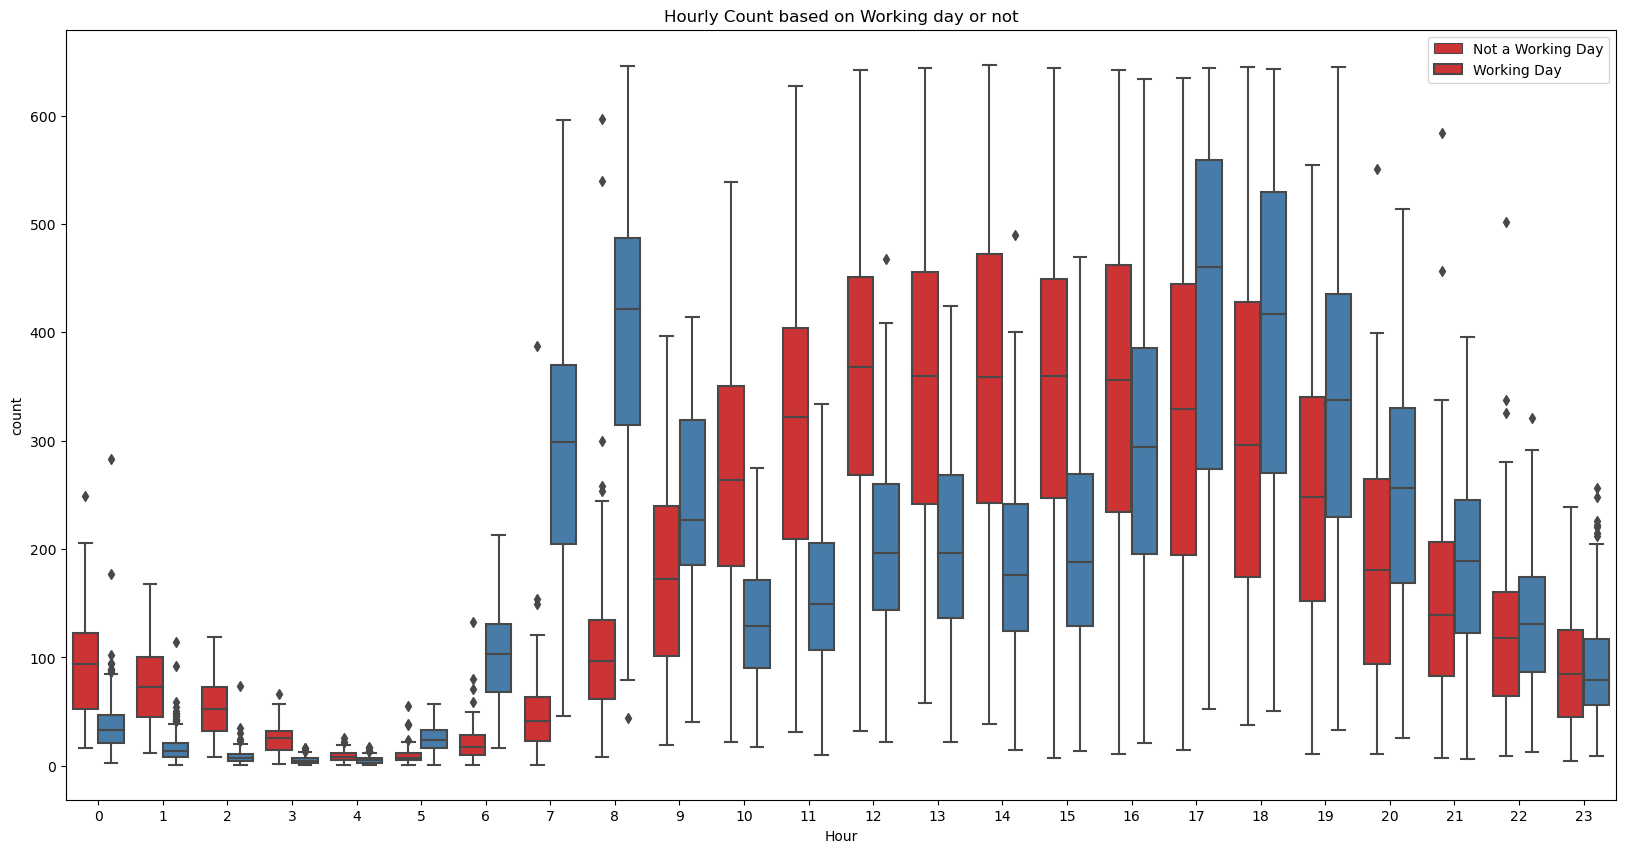

In [39]:
f,axes=plt.subplots(1,1,figsize=(20,10))
sns.boxplot(data=df_train,y='count',x='Hour',hue='workingday',ax=axes,palette='Set1')
handles,_=axes.get_legend_handles_labels()
axes.legend(handles,labels=['Not a Working Day','Working Day'])
axes.set(title='Hourly Count based on Working day or not')

plt.show()

白天共享单车需求量明显高于夜晚；在工作日，共享单车需求量在上下班时达到高峰，而其他时间较少；在非工作日，共享单车需求量在中午和下午较高。

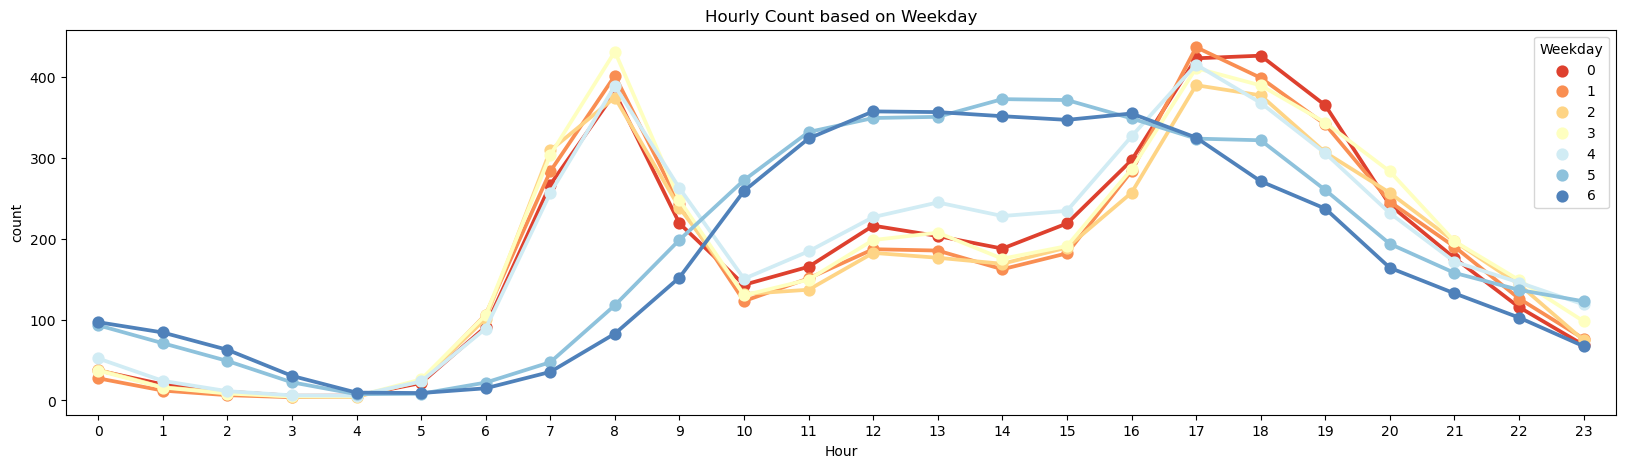

In [40]:
f, axes = plt.subplots(1,1, figsize=(20,5))
agg_weekday_hour = pd.DataFrame(df_train.groupby(['Weekday', 'Hour'])['count'].mean().reset_index())
sns.pointplot(data=agg_weekday_hour, x='Hour', y='count', hue='Weekday', ax=axes, palette='RdYlBu')
axes.set(title='Hourly Count based on Weekday')

plt.show()

#### Weekday

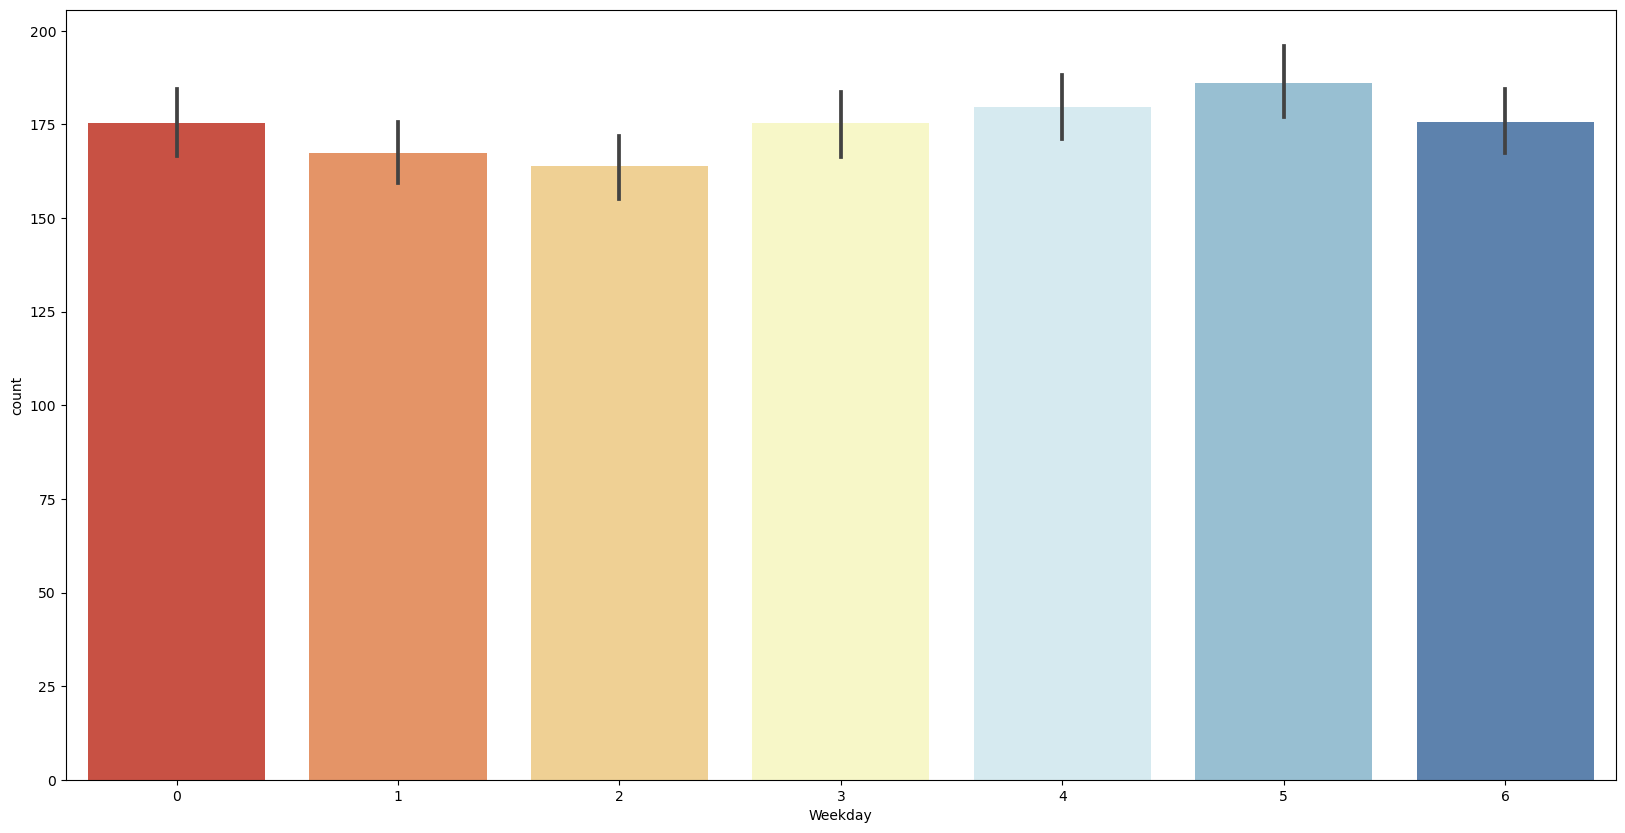

In [41]:
fig=plt.figure(figsize=(20,10))
sns.barplot(data=df_train,x='Weekday',y='count',palette='RdYlBu')
plt.show()

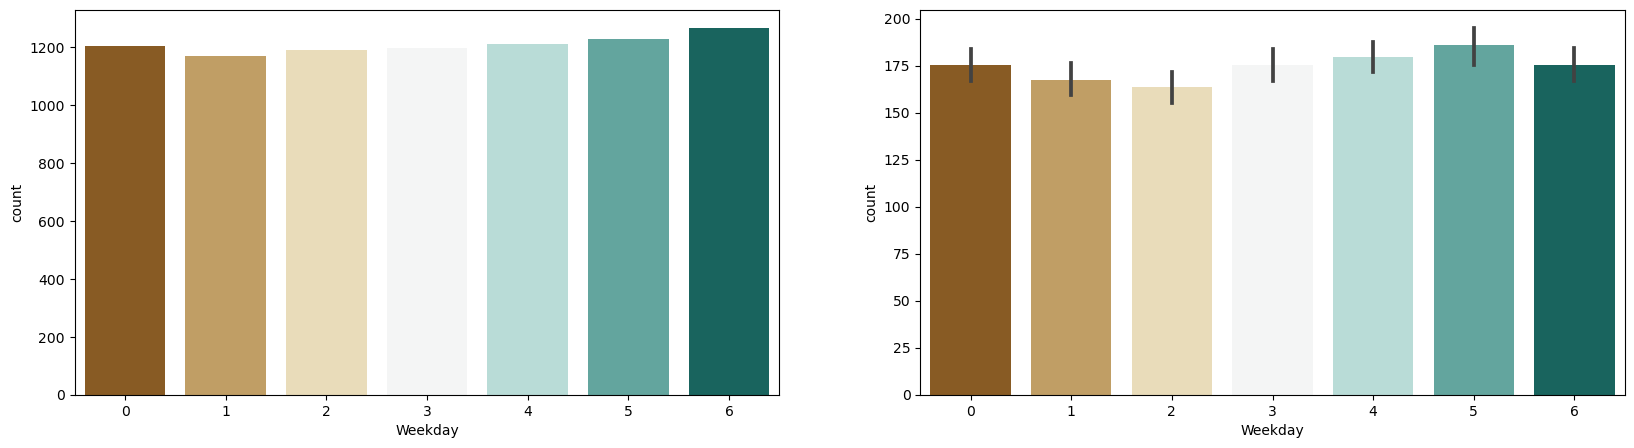

In [42]:
f,axes=plt.subplots(1,2,figsize=(20,5))
sns.countplot(data=df_train,x='Weekday',ax=axes[0],palette='BrBG')
sns.barplot(data=df_train,x='Weekday',y='count',ax=axes[1],palette='BrBG')

plt.show()

#### Month

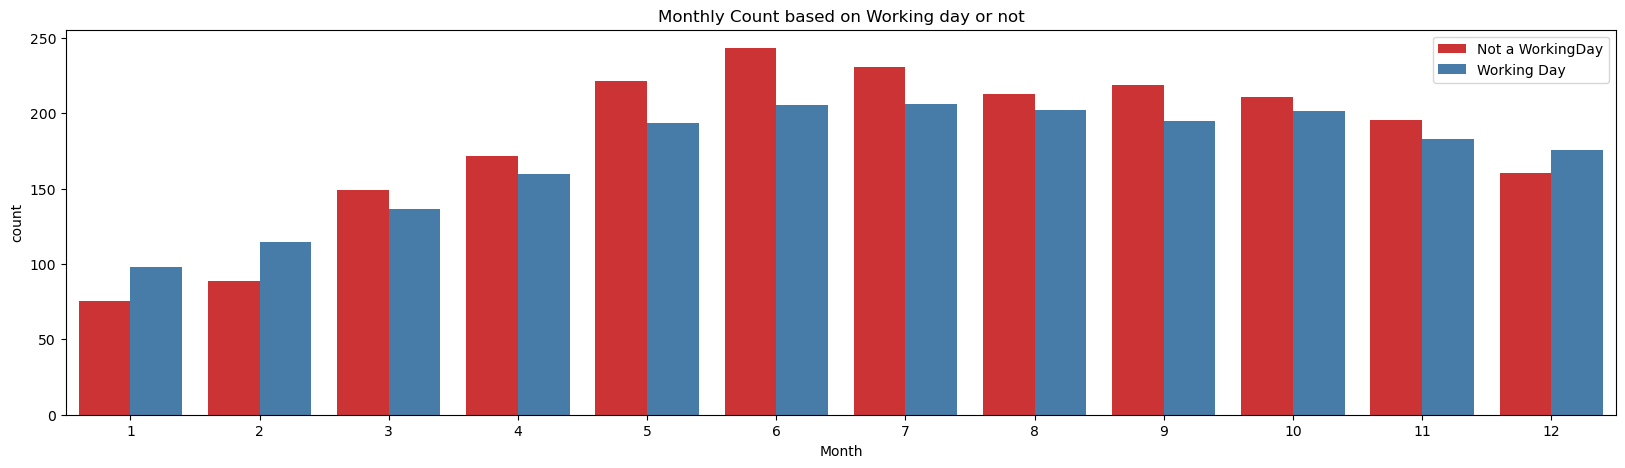

In [43]:
f,axes=plt.subplots(1,1,figsize=(20,5))
agg_month=pd.DataFrame(df_train.groupby(['Month','workingday']).mean().reset_index())
sns.barplot(data=agg_month,x='Month',y='count',hue='workingday',ax=axes,palette='Set1')
handles,_=axes.get_legend_handles_labels()
axes.legend(handles,['Not a WorkingDay','Working Day'])
axes.set(title='Monthly Count based on Working day or not')

plt.show()

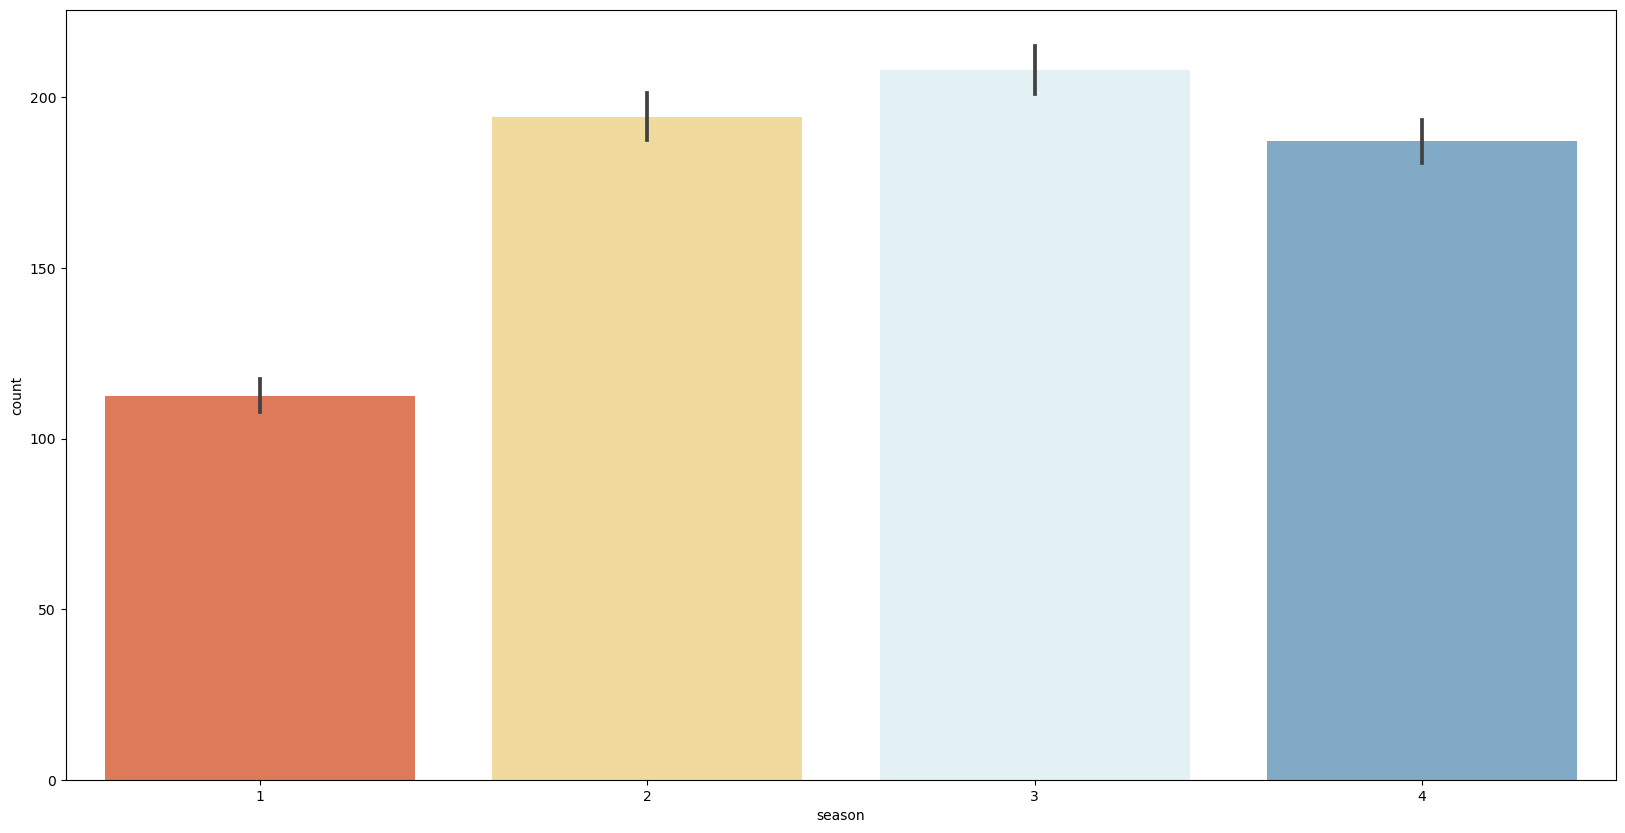

In [44]:
fig=plt.figure(figsize=(20,10))
sns.barplot(data=df_train,x='season',y='count',palette='RdYlBu')
plt.show()

在夏季和秋季共享单车需求量较大，从月份中也可以看出，包含了season的信息，因此season列可以drop

#### Year

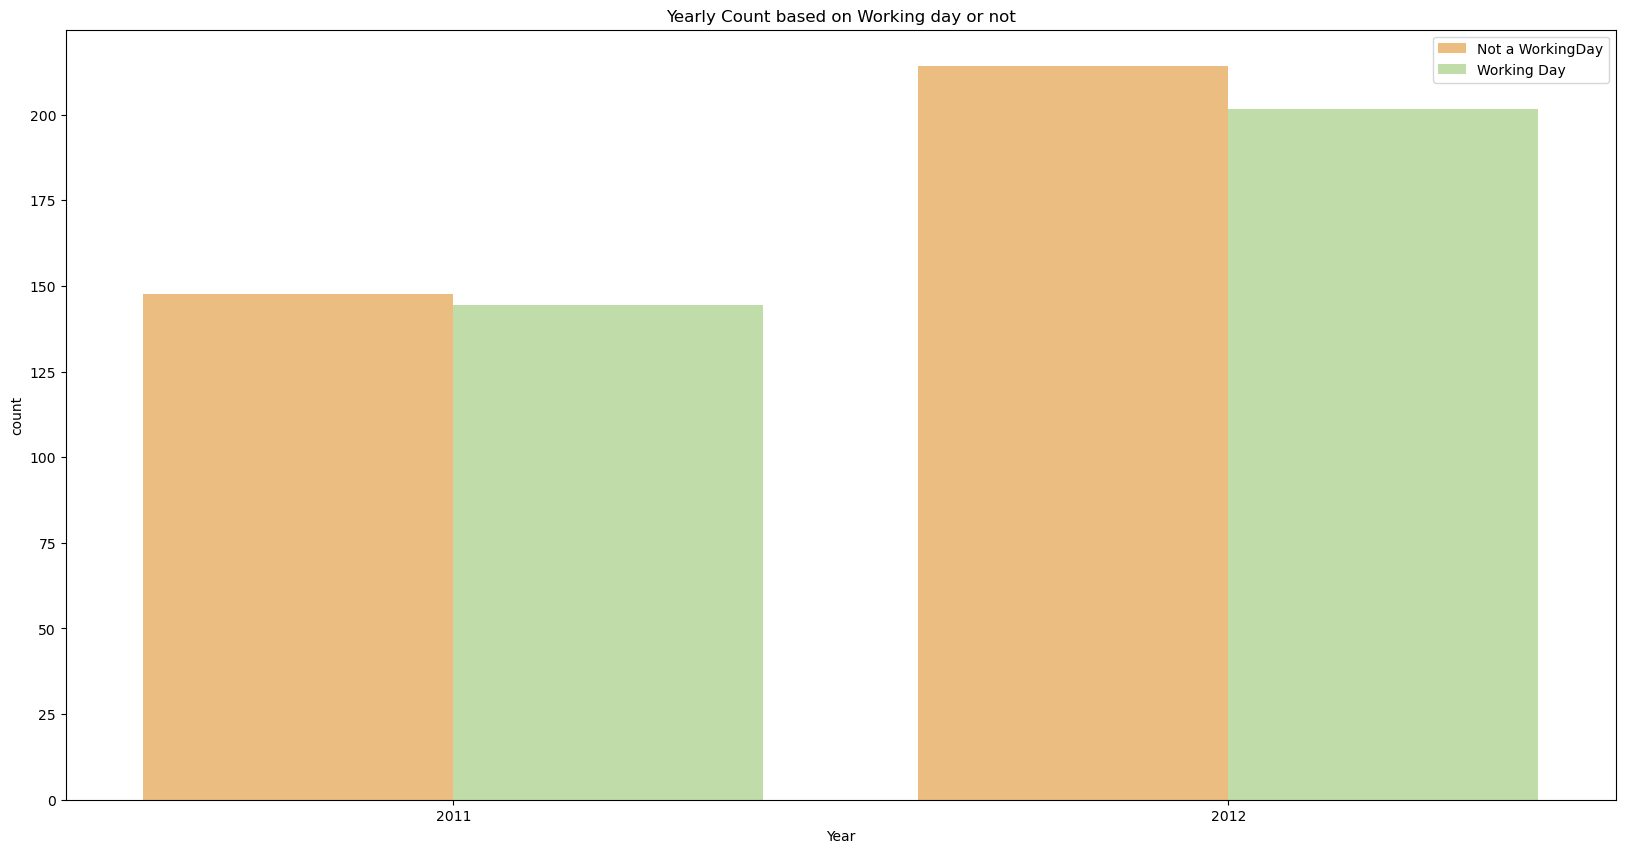

In [45]:
f,axes=plt.subplots(1,1,figsize=(20,10))
agg_month=pd.DataFrame(df_train.groupby(['Year','workingday']).mean().reset_index())
sns.barplot(data=agg_month,x='Year',y='count',hue='workingday',ax=axes,palette='Spectral')
handles,_=axes.get_legend_handles_labels()
axes.legend(handles,['Not a WorkingDay','Working Day'])
axes.set(title='Yearly Count based on Working day or not')

plt.show()

第二年共享单车需求量明显比上一年大

#### Periodic Features
其中月、周、时具有周期性特征，如月份1与12数字上相差很大而实际很接近。

常见有两种周期性特征：   
1. 周期性指示器：适合于观测较少的情况，比如每周观测一次的周期；
2. 傅里叶特征：适合于存在许多观测的周期，比如每年每日观测周期；

此处由于采样较多，选用傅里叶特征，即一对正弦和余弦曲线，捕捉该周期性信息   
于是转换成sin、cos替代

In [46]:
def periodic_transform(df, variable):
    df[f"{variable}_sin"] = np.sin(df[variable] / df[variable].max() * 2 * np.pi)
    df[f"{variable}_cos"] = np.cos(df[variable] / df[variable].max() * 2 * np.pi)
    return df

In [47]:
df_train=periodic_transform(df_train, 'Month')
df_train=periodic_transform(df_train, 'Weekday')
df_train=periodic_transform(df_train, 'Hour')

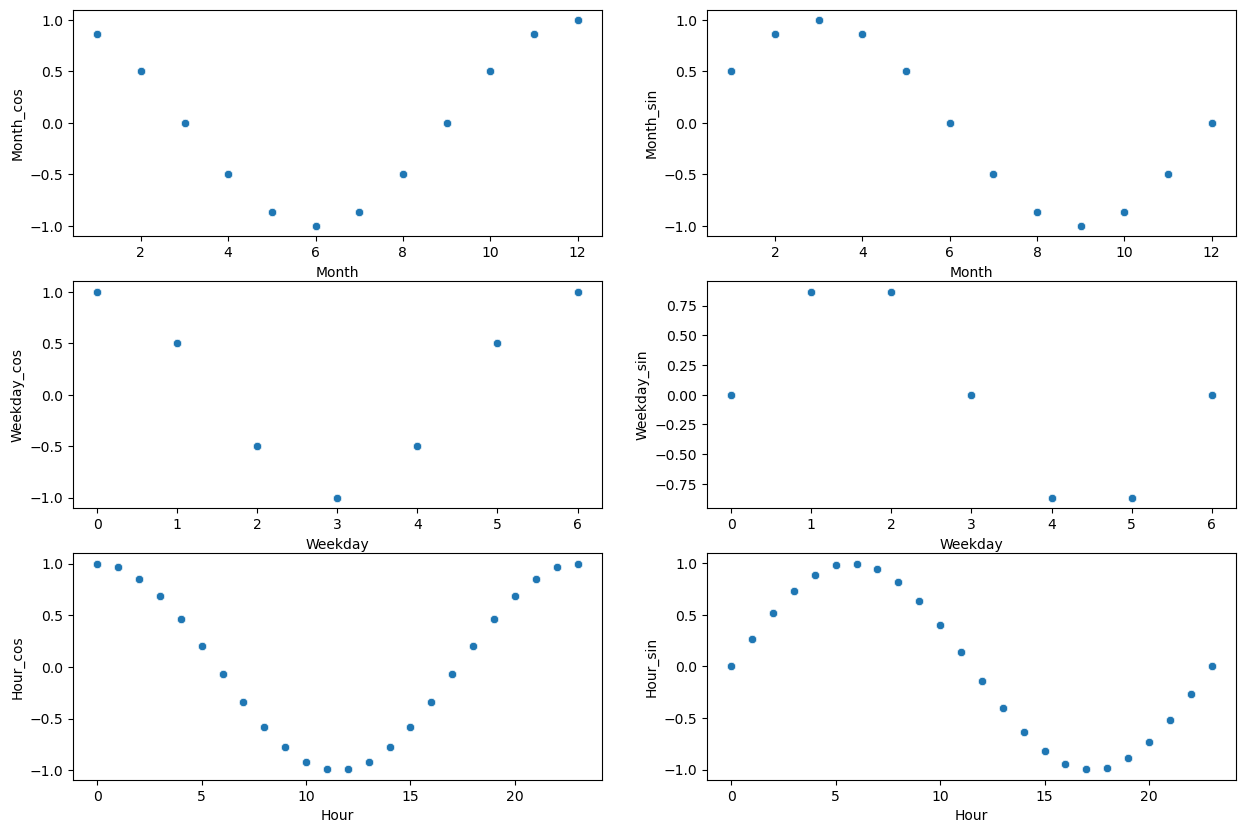

In [48]:
f,axes=plt.subplots(3,2,figsize=(15,10))
sns.scatterplot(data=df_train,x='Month',y='Month_cos',ax=axes[0][0])
sns.scatterplot(data=df_train,x='Month',y='Month_sin',ax=axes[0][1])
sns.scatterplot(data=df_train,x='Weekday',y='Weekday_cos',ax=axes[1][0])
sns.scatterplot(data=df_train,x='Weekday',y='Weekday_sin',ax=axes[1][1])
sns.scatterplot(data=df_train,x='Hour',y='Hour_cos',ax=axes[2][0])
sns.scatterplot(data=df_train,x='Hour',y='Hour_sin',ax=axes[2][1])
plt.show()

## 2.3：Clean up

datetime、Hour、Month、Weekday、count:有了替代值→drop    
season:月份信息包含了季节信息→drop    
atemp:temp和atemp成明显线性相关。为了简化模型可以去掉其中一个,此处选择atemp→drop   

In [49]:
df_train.drop(["datetime","Hour","Month","Weekday","season","atemp","casual", "registered","count"],axis=1,inplace=True)

In [50]:
df_train.columns

Index(['holiday', 'workingday', 'weather', 'temp', 'humidity', 'windspeed',
       'log_count', 'Year', 'Month_sin', 'Month_cos', 'Weekday_sin',
       'Weekday_cos', 'Hour_sin', 'Hour_cos'],
      dtype='object')

## 2.4：对df_validate做相同处理

In [52]:
df_validate['datetime']=pd.to_datetime(df_validate['datetime'])
df_validate['Year']=df_validate['datetime'].dt.year
df_validate['Month']=df_validate['datetime'].dt.month
df_validate['Weekday']=df_validate['datetime'].dt.weekday
df_validate['Hour']=df_validate['datetime'].dt.hour

In [53]:
df_validate=periodic_transform(df_validate, 'Month')
df_validate=periodic_transform(df_validate, 'Weekday')
df_validate=periodic_transform(df_validate, 'Hour')

In [54]:
df_validate['humidity']=np.where(df_validate['humidity']==0,10,df_validate['humidity'])
df_validate['windspeed']=np.where(df_validate['windspeed']>37,37,df_validate['windspeed'])

In [55]:
df_validate['log_count']=np.log(df_validate['count'])

In [56]:
df_validate.drop(["datetime","Hour","Month","Weekday","season","atemp","casual", "registered","count"],axis=1,inplace=True)

In [57]:
df_validate.columns

Index(['holiday', 'workingday', 'weather', 'temp', 'humidity', 'windspeed',
       'Year', 'Month_sin', 'Month_cos', 'Weekday_sin', 'Weekday_cos',
       'Hour_sin', 'Hour_cos', 'log_count'],
      dtype='object')

# 三、模型评估

In [58]:
from sklearn.linear_model import LinearRegression # 线性回归
from sklearn.preprocessing import PolynomialFeatures # 多项式回归
from sklearn.svm import SVR # 支持向量回归
from sklearn.ensemble import RandomForestRegressor # 随机森林回归
import xgboost as xgb # XGBoost

def rmsle(y_true, y_pred): # 均方根对数误差
        L1 = np.log1p(np.exp(y_true))
        L2 = np.log1p(np.exp(y_pred))    
        calc = (L1 - L2) ** 2
        return np.sqrt(np.mean(calc))

In [59]:
X_Train=df_train.drop('log_count',axis=1)
y_Train=df_train['log_count']

In [60]:
X_Validate=df_validate.drop('log_count',axis=1)
y_Validate=df_validate['log_count']

## 3.1：LinearRegression

In [61]:
model = LinearRegression()
model.fit(X_Train, y_Train)
y_train_predict = model.predict(X_Train)
y_validate_predict = model.predict(y_Validate)

vali_msle = rmsle(y_validate, y_validate_predict)
print("MSLE: ",vali_msle)

ValueError: Expected 2D array, got 1D array instead:
array=[5.49716823 5.47646355 5.433722   ... 6.44094654 6.10924758 4.31748811].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

## 3.2：PolynomialFeatures

## 四、模型应用